## Import Necessary Libraries

In [ ]:
pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers

## LOADING MODEL

**LABELS**

In [2]:
labels =  {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 
             7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 
             14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 
             20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z',
             26:"DEL" , 27:"NOTHING" , 28:"SPACE"}

In [39]:
from keras.models import load_model
loaded_model = load_model("model2.h5")

### Prediction Using Uploaded Model

1/1 [==============================] - 0s 116ms/step


Text(0.5, 1.0, 'Predicted Result W')

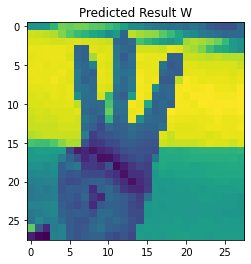

In [40]:
#C:\Users\Dell\OneDrive\Desktop\Resume\ASL_1GB\asl_alphabet_test\asl_alphabet_test
path = r"C:\Users\Dell\OneDrive\Desktop\Resume\ASL_1GB\asl_alphabet_test\asl_alphabet_test\W_test.jpg"
image_size=(28, 28)
img = keras.preprocessing.image.load_img( path ,  color_mode="grayscale" ,  target_size=image_size)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = loaded_model.predict(img_array)
result = labels[np.argmax(predictions)] 

plt.imshow(img_array.numpy().astype("uint8").reshape((28, 28)))
plt.title("Predicted Result " + result )

## USING CV2
1. Use of cv2 For live stream Detection

In [41]:
import cv2
import numpy as np
from PIL import Image

In [51]:
video = cv2.VideoCapture(0) #Capture video drom storage/Laptop Camera / Any Other Camera Avail


In [52]:
while True:
        _, frame = video.read()                           #Read Image From Video One By one in Array
        
        #Sharpening of Image
        kernel = np.array([[0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]])
        image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
        
        gray = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2GRAY)    #Convert the image(array) into graysale
        im = gray[5:200, 5:200]                                 #Croping the image
        #plt.imshow(im)
        im = Image.fromarray(im)                                #Convert Image From Array       
        
        
        im = im.resize((28,28))                                 #Resize the image to the desired input size
        img_array = np.array(im)                                #Converting again to np array        
        img_array  = np.expand_dims(img_array, axis=2)          #Adding Dimension from 28*28 to 28*28*1
        #plt.imshow(img_array.reshape((28, 28)))
        

        #Our keras model used a 4D tensor, (images x height x width x channel)
        #So changing dimension 128x128x1 into 1x128x128x1
        img_array = np.expand_dims(img_array, axis=0)
        predictions = loaded_model.predict(img_array)           #Loading Model 
        result = labels[np.argmax(predictions)] 
        #print(result)
        
        start_point = (5, 5)                                    # Represents the top left corner of rectangle
        end_point = (200, 200)                                  # Represents the bottom right corner of rectangle
        color = (255, 0, 0)
        thickness = 2                                           # Line thickness of 2 px
        frame = cv2.rectangle(frame, start_point, end_point, color, thickness)
        
        #To Display Result on Screen
        text = result
        coordinates = (40,230)
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (255, 0, 0)
        thickness = 2
        frame = cv2.putText(frame, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)
        
        cv2.imshow("Capturing", frame)
        key=cv2.waitKey(100)     #Wait Till Key is Pressed 
        if key == ord('q'):
                break
video.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 5ms/step
